In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
    
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import random
np.random.seed(0)

In [2]:
mice_data = pd.read_csv("Data_Cortex_Nuclear.csv")

In [3]:
mice_data

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

I will now check the amount of null values in the dataset

In [4]:
mice_data.isnull().sum().sum()

1396

In [5]:
names = mice_data.columns

The amount of null values is high, thus it can not really be ignored. In particular there are three different replicats with too many NA values, I will then delete them. I will handle the rest using the mean of the column, filtered by class, to obtain an average value thanks to which we can substutute the NA values.

## DATA PROCESSING

In [6]:
# The paper suggested 3 observation that had too many NA and must be excluded
na_mice = ["3426_13", "3426_14", "3426_15"]

for x in na_mice:
    mice_data = mice_data[mice_data["MouseID"] != x]
    
mice_data.reset_index(drop=True, inplace=True)

The variable MiceID is not useful for our analysis since it's just used to distinguish the replicates. I will then remove it since it can be replaced with the row index since they give the same information

In [7]:
mice_data = mice_data.drop('MouseID', axis=1)

Saving qualitative columns before dropping them. I will perform two analyses, one with qualitative data and one
without them

In [8]:
genot = mice_data["Genotype"]
treat = mice_data["Treatment"]
behav = mice_data["Behavior"]

In [9]:
# dropping the three variables above

mice_data = mice_data.drop(["Genotype", "Treatment", "Behavior"], axis=1)

I will now create a new dataset, containing the list of all the mean values for the genes of a class

In [10]:
mice_cols = mice_data.columns
classes = ["c-CS-m", "c-SC-m", "c-CS-s", "c-SC-s", "t-CS-m", "t-SC-m", "t-CS-s", "t-SC-s"]
mean_rows = []

for x in classes:
    r = ((mice_data[mice_data["class"] == x].loc[:, mice_data.columns != "class"]).mean()).tolist()
    r.append(x)
    mean_rows.append(r)

# convert the list of lists in a pandas dataframe
mice_mean_exp = pd.DataFrame(mean_rows)
# assign columns' names
mice_mean_exp.columns = mice_cols

# visualize the dataset
mice_mean_exp

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.480456  0.652587  0.339217  2.381749  4.308540  0.229932  0.182211   
1  0.273203  0.436361  0.290946  2.145633  3.459416  0.241253  0.189547   
2  0.596748  0.772395  0.342315  2.417809  4.280077  0.212423  0.168356   
3  0.274823  0.449354  0.313393  2.404974  3.913096  0.233368  0.184975   
4  0.619294  0.797007  0.312732  2.196541  3.565960  0.213621  0.173956   
5  0.329861  0.566783  0.321063  2.379446  4.056223  0.269131  0.201007   
6  0.525735  0.759556  0.305460  2.184606  3.514839  0.214466  0.164795   
7  0.337488  0.549056  0.325586  2.248742  3.565093  0.246759  0.185318   

   pCAMKII_N   pCREB_N    pELK_N  ...     BAD_N    BCL2_N     pS6_N   pCFOS_N  \
0   2.916187  0.198484  1.492318  ...  0.156882  0.132539  0.119782  0.123929   
1   4.736327  0.208149  1.278566  ...  0.169294  0.155980  0.128108  0.143614   
2   2.935576  0.208439  1.686844  ...  0.144670  0.126590  0.112512  0.126954   
3   3.361288  0.214949  1.327714  ...  0.156121  0.133082  0.132929  0.135007   
4   3.121801  0.203395  1.563905  ...  0.150572  0.132005  0.108196  0.127762   
5   4.277257  0.231789  1.381516  ...  0.153697  0.137467  0.137287  0.130234   
6   2.488902  0.210041  1.518302  ...  0.150884  0.130186  0.111354  0.121971   
7   4.176555  0.227165  1.204840  ...  0.174501  0.137119  0.119205  0.134255   

      SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N   class  
0  0.467403   0.142027  0.174599  0.178675  1.523659  c-CS-m  
1  0.456874   0.185664  0.217339  0.220825  1.009957  c-SC-m  
2  0.445322   0.145542  0.166534  0.172007  1.617609  c-CS-s  
3  0.471512   0.152480  0.200690  0.219120  1.157639  c-SC-s  
4  0.413597   0.149539  0.162359  0.180920  1.633341  t-CS-m  
5  0.445738   0.226197  0.196089  0.247652  1.041134  t-SC-m  
6  0.433587   0.158388  0.158174  0.191430  1.552633  t-CS-s  
7  0.428424   0.209899  0.184307  0.226818  1.224570  t-SC-s  

[8 rows x 78 columns]

I will now replace the NA values with the average expression of the column

In [11]:

# iterate over all columns in mice_data apart from the 'class' column
for col in mice_data.columns[:-1:]:
    # iterate over all rows saving index of the row and value contained in that cell
    for ind, val in enumerate(mice_data[col]):
        # check if the value is a missing value
        if pd.isna(val):
            # save the class of mice related to the missing value
            cls = mice_data['class'][ind]
            # get the corresponding value from the mice_mean_exp dataframe
            to_replace = mice_mean_exp[mice_mean_exp['class'] == cls][col]
            # replace the missing value
            mice_data = mice_data.replace([val], to_replace)

In [12]:
mice_data.isnull().sum().sum()

0

I will now add back the categorical variables to the main dataset. At the end of this analysis I will try the same analysis with a dataset identical to mice_data, except for the absence of the categorical variables

In [13]:
# insert again the categorical data removed before
mice_data["Genotype"] = genot
mice_data["Treatment"] = treat
mice_data["Behavior"] = behav

In [14]:
mice_data_ext = mice_data.copy()
mice_data_ext['class'] = mice_data_ext['class'].replace(
    {
        "c-CS-m":0, 
        "c-SC-m":1,
        "c-CS-s":2,
        "c-SC-s":3,
        "t-CS-m":4,
        "t-SC-m":5,
        "t-CS-s":6,
        "t-SC-s":7
    }
)

In [15]:
X = mice_data_ext.drop(["class"], axis=1)
y = mice_data_ext["class"]

print(X.shape)
print(y.shape)

(1077, 80)
(1077,)


We still need to transform the categorical variables with onehot encoding to actually perform the plotting and the clustering

In [16]:
def onehot_feature(pd_data, column_name):
    # Retrieve the unique values (the categories) and an index for each sample
    # specifying the sample category (values[value_idx] reconstruct the original array)
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    # Create a temporary identity matrix to convert value_idx into one-hot features
    onehots = np.eye(n_values, n_values)
    value_onehot = onehots[value_idx]
    # Remove the categorical feature
    pd_data = pd_data.drop(column_name, axis=1)
    # Add the new featues
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return pd_data

X = onehot_feature(X, 'Genotype')
X = onehot_feature(X, 'Treatment')
X = onehot_feature(X, 'Behavior')

The choice of keeping the categorical variables can be argued since their presence is a direct association to the class itself, I will then expect the tests to perform better compared to the dataset without them. I will anyway do both analysis, showing the difference on purity as delta.

To correctly cluster the data we need first to normalize it, in particolar the MinMax normalization was the choice taken. This type of normalization will leave us with a dataset that contains values between the interval 0 and 1. Normalization is an important factor in gene expression and should be always taken into consideration when working with this kind of data

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

mice_scaled = scaler.fit_transform(X)
mice_scaled = pd.DataFrame(mice_scaled)
mice_scaled.head()


0         1         2         3         4         5         6   \
0  0.151122  0.212885  0.824638  0.612119  0.630482  0.327006  0.448666   
1  0.155750  0.188226  0.776455  0.601070  0.585247  0.311887  0.429899   
2  0.153459  0.205696  0.793572  0.558911  0.575910  0.306369  0.441381   
3  0.125169  0.157688  0.637326  0.468152  0.480646  0.335530  0.444307   
4  0.122146  0.157838  0.637787  0.426467  0.441977  0.314976  0.433100   

         7         8         9   ...        73        74        75        76  \
0  0.168257  0.617322  0.232553  ...  0.028928  0.022112  0.022165  0.705738   
1  0.154925  0.590173  0.205362  ...  0.026612  0.024903  0.024628  0.749771   
2  0.153485  0.607102  0.199194  ...  0.026537  0.023436  0.021532  0.868229   
3  0.132074  0.486945  0.205135  ...  0.041806  0.035298  0.037879  0.721879   
4  0.129086  0.410194  0.189152  ...  0.031977  0.029292  0.039121  0.812053   

    77   78   79   80   81   82  
0  1.0  0.0  1.0  0.0  1.0  0.0  
1  1.0  0.0  1.0  0.0  1.0  0.0  
2  1.0  0.0  1.0  0.0  1.0  0.0  
3  1.0  0.0  1.0  0.0  1.0  0.0  
4  1.0  0.0  1.0  0.0  1.0  0.0  

[5 rows x 83 columns]

To visualize the data dimensionality reduction is needed, in particolar Principal Component Analysis is the one used in order to obtain the three components that explain the most the variance present in the dataset

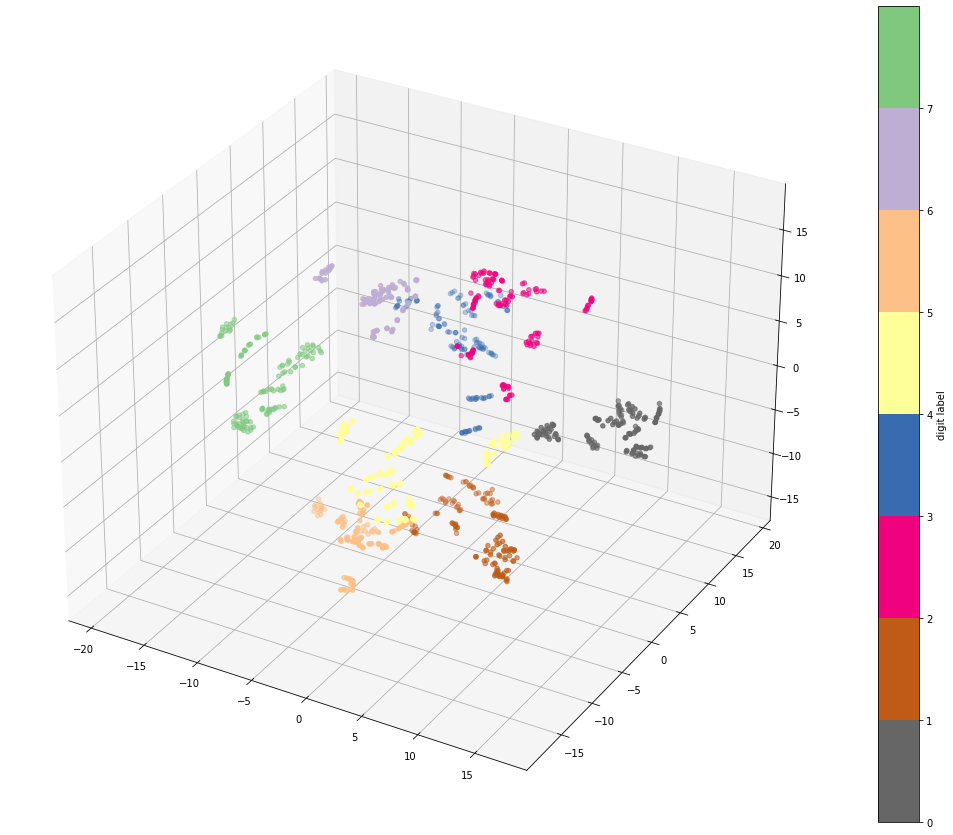

In [18]:
from sklearn.manifold import TSNE
def plot3d(X, labels):
    # Set matplotlib to generate static images
    %matplotlib inline
    # Set matplotlib as interactive
    #matplotlib notebook
    # This import is required to set up the 3D environment
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = TSNE(n_components=3)
    # Reduce features dimensionality, just for visualization
    # purpuses
    X = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)
    # Convert negative values (outliers) into positive
    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(111, projection='3d')
    # Define color mappings
    col = 'Accent_r'
    cmap = plt.cm.get_cmap(col)
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    # Plot the 3d coordinates (similar to standard scatter plots, we just
    # need to provide an additional z coordinate!)
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], c=labels, cmap=cmap)
    # Plot a color bar on the right
    plt.colorbar(mappable=smap, label='digit label', ticks=range(nlabels))
    
plot3d(mice_scaled, labels=y)


Thanks also to the use of categorical variables it is possible to obtain a clear separation between the different clusters. However, this is only a visualization and it is not used to test different clustering algorithms

## Hierarchical Clustering

Hierarchical clustering was used to cluster the data, while to visualize the data clustering itself a dendrogram will be used

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
        #kwargs['color_threshold'] = None
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs)
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax
   

In [21]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i) #indices of the samples in this cluster
        # Compute combinations of these indices
        xx, yy = np.meshgrid(sample_idx, sample_idx)
        mat[xx, yy] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = inc @ sim.T
    
    return corr[0,0]   

In [22]:
def get_Ncounts(y_predict, y_true, k, j=None):
    N = y_true.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y_true == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    
def recall(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r)

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

I will now compare some of the different methods of clustering, using the purity as the score to identify the methods that divide the different cluster in the best way

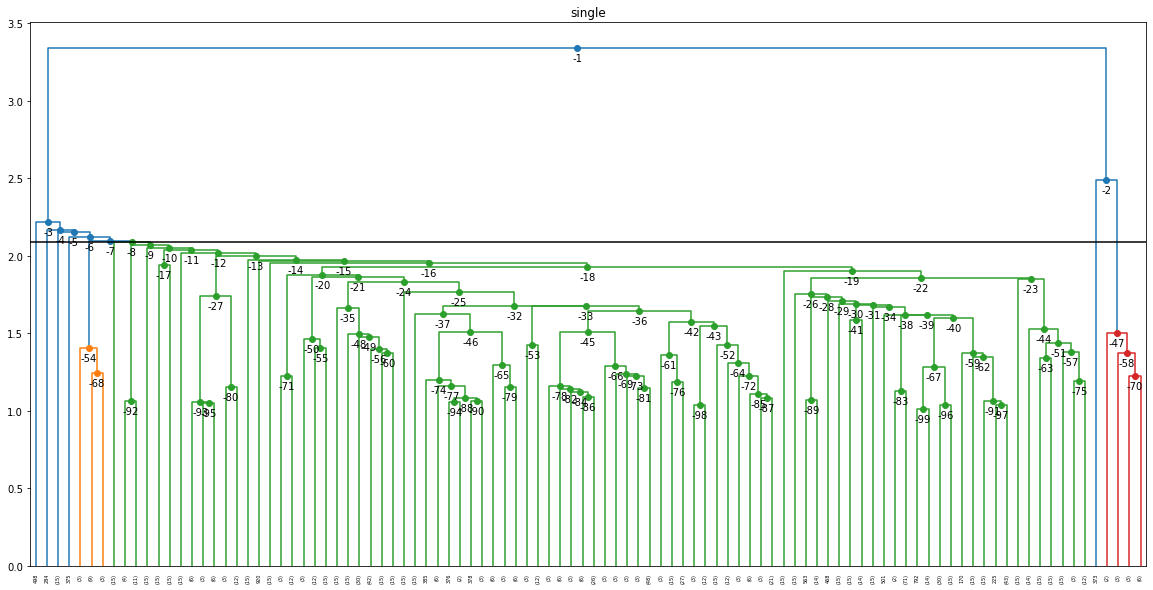

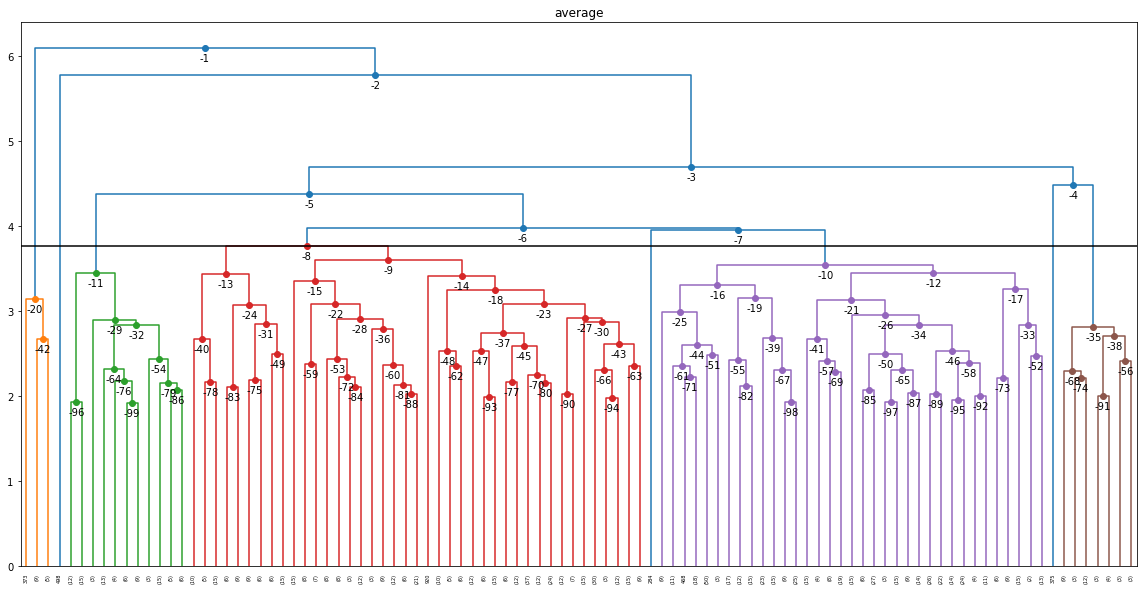

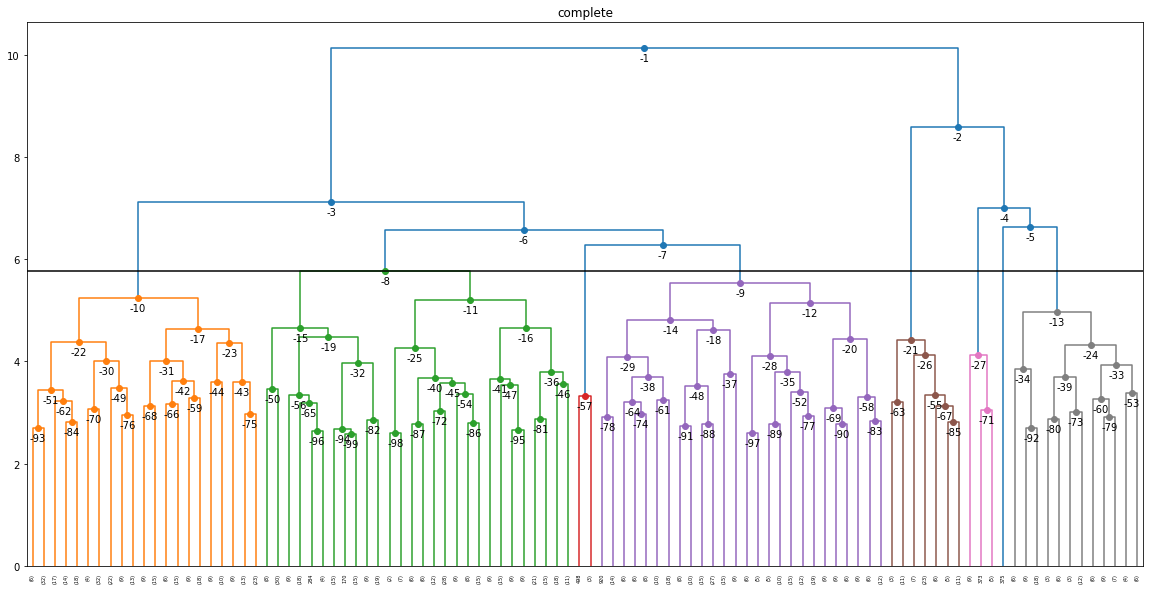

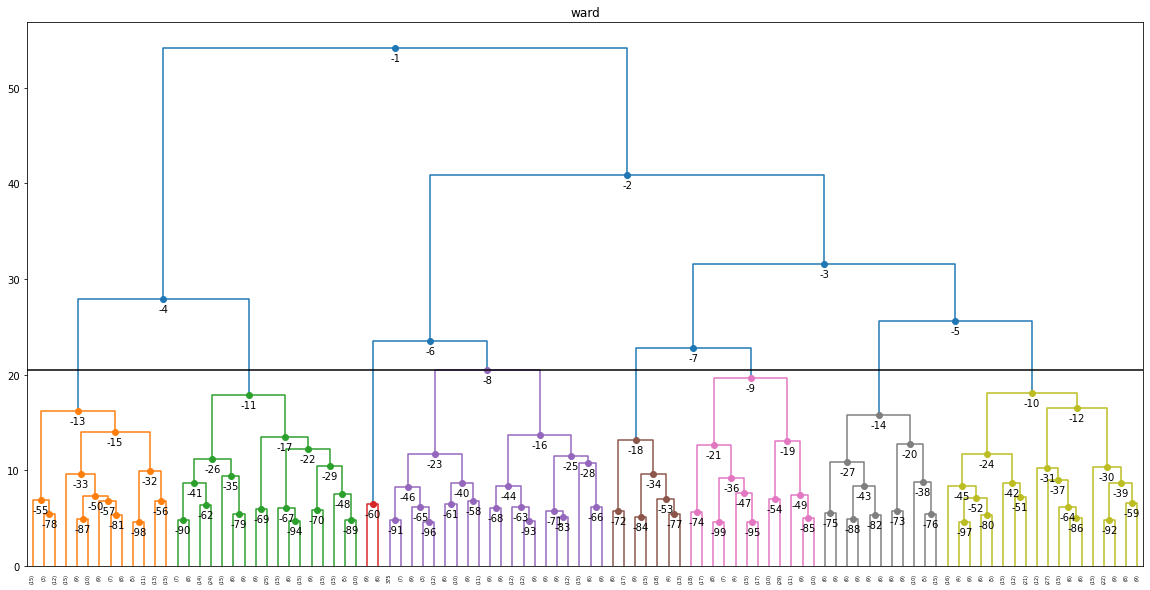

In [23]:
from sklearn.cluster import AgglomerativeClustering

methods = ['single', 'average', 'complete', 'ward']
results = []
distance_threshold=None
n_clusters=8

for i in methods:
    model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=distance_threshold, affinity='euclidean', linkage=i)
    y_predict = model.fit_predict(X)
    results.append([i,tot_purity(y_predict, y)])
    
    fig, ax = plot_dendrogram(model=model, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=8)
    ax.set_title(i)
    plt.plot()
                                

In [24]:
for i in results:
    print(f"Purity with '{i[0]}' method: {i[1]}")

Purity with 'single' method: 0.18291550596894335
Purity with 'average' method: 0.3129062209320154
Purity with 'complete' method: 0.3036211698725664
Purity with 'ward' method: 0.5478180129533966


The Ward's method seem to be the most consistent one with a purity of 0.547.

Since Ward's method is the best from the four clustering types we considered since now, I will now visualize it

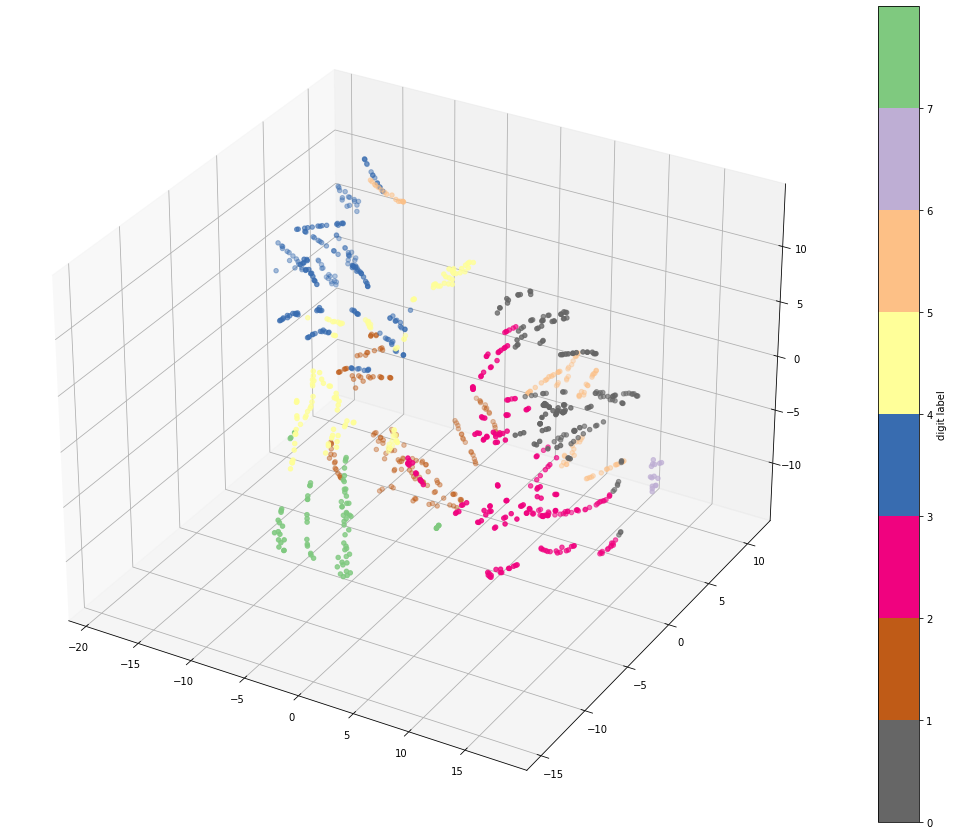

In [25]:
model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=distance_threshold, 
                                affinity='euclidean', linkage='ward')



y_predict = model.fit_predict(X)

plot3d(X, labels=y_predict)

The plot shows the distribution of the different clusters in a 3D space using the Ward's method.
I will now compare the Ward's purity with a random clustering

In [26]:
y_rand = np.random.randint(0, n_clusters, y.shape[0])
ward_purity = tot_purity( y_predict, y)
print("Random clustering method: " + str(tot_purity( y_rand, y)))
print("Ward's clustering method: " + str(tot_purity( y_predict, y)))
print("Delta: " + str(tot_purity( y_predict, y) - tot_purity( y_rand, y)))

Random clustering method: 0.17827298048811271
Ward's clustering method: 0.5478180129533966
Delta: 0.3695450324652839


In [27]:
def sorted_mat(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted,:]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def plot_sorted_mat(sim, y_pred):
    sim = sorted_mat(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks([])

I will now plot the incidence matrix and compare it with the similarity one, to show any difference

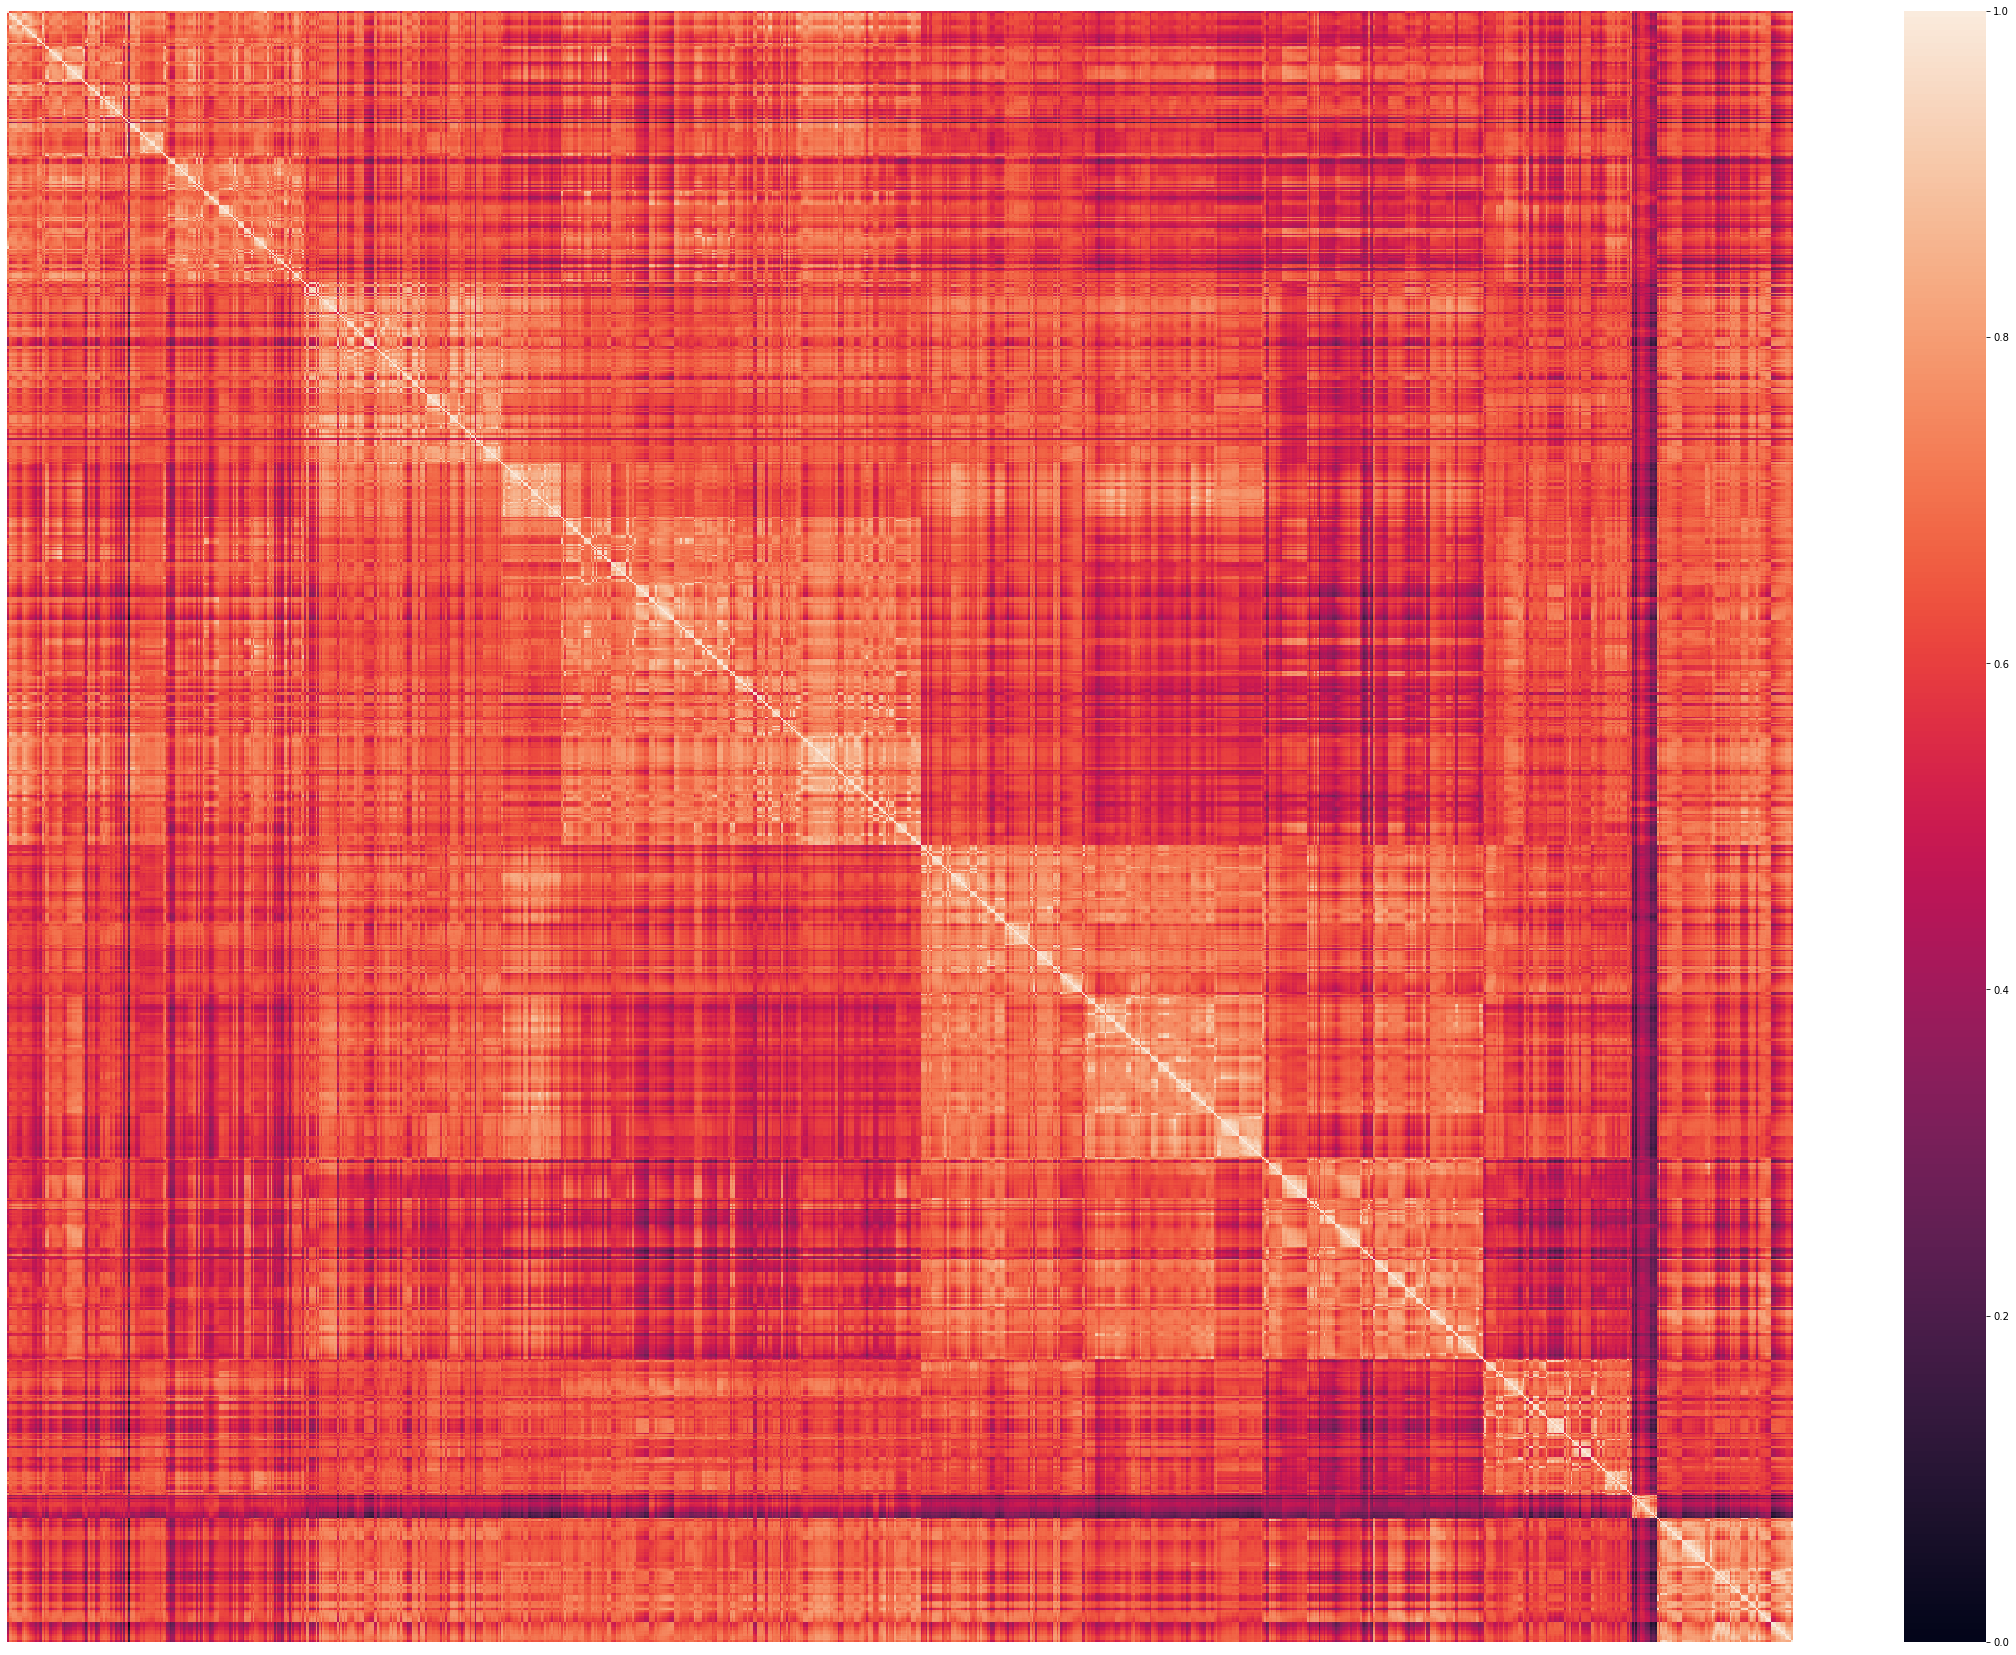

In [28]:
sim = similarity_mat(X, 'euclidean')
plot_sorted_mat(sim, y_predict)

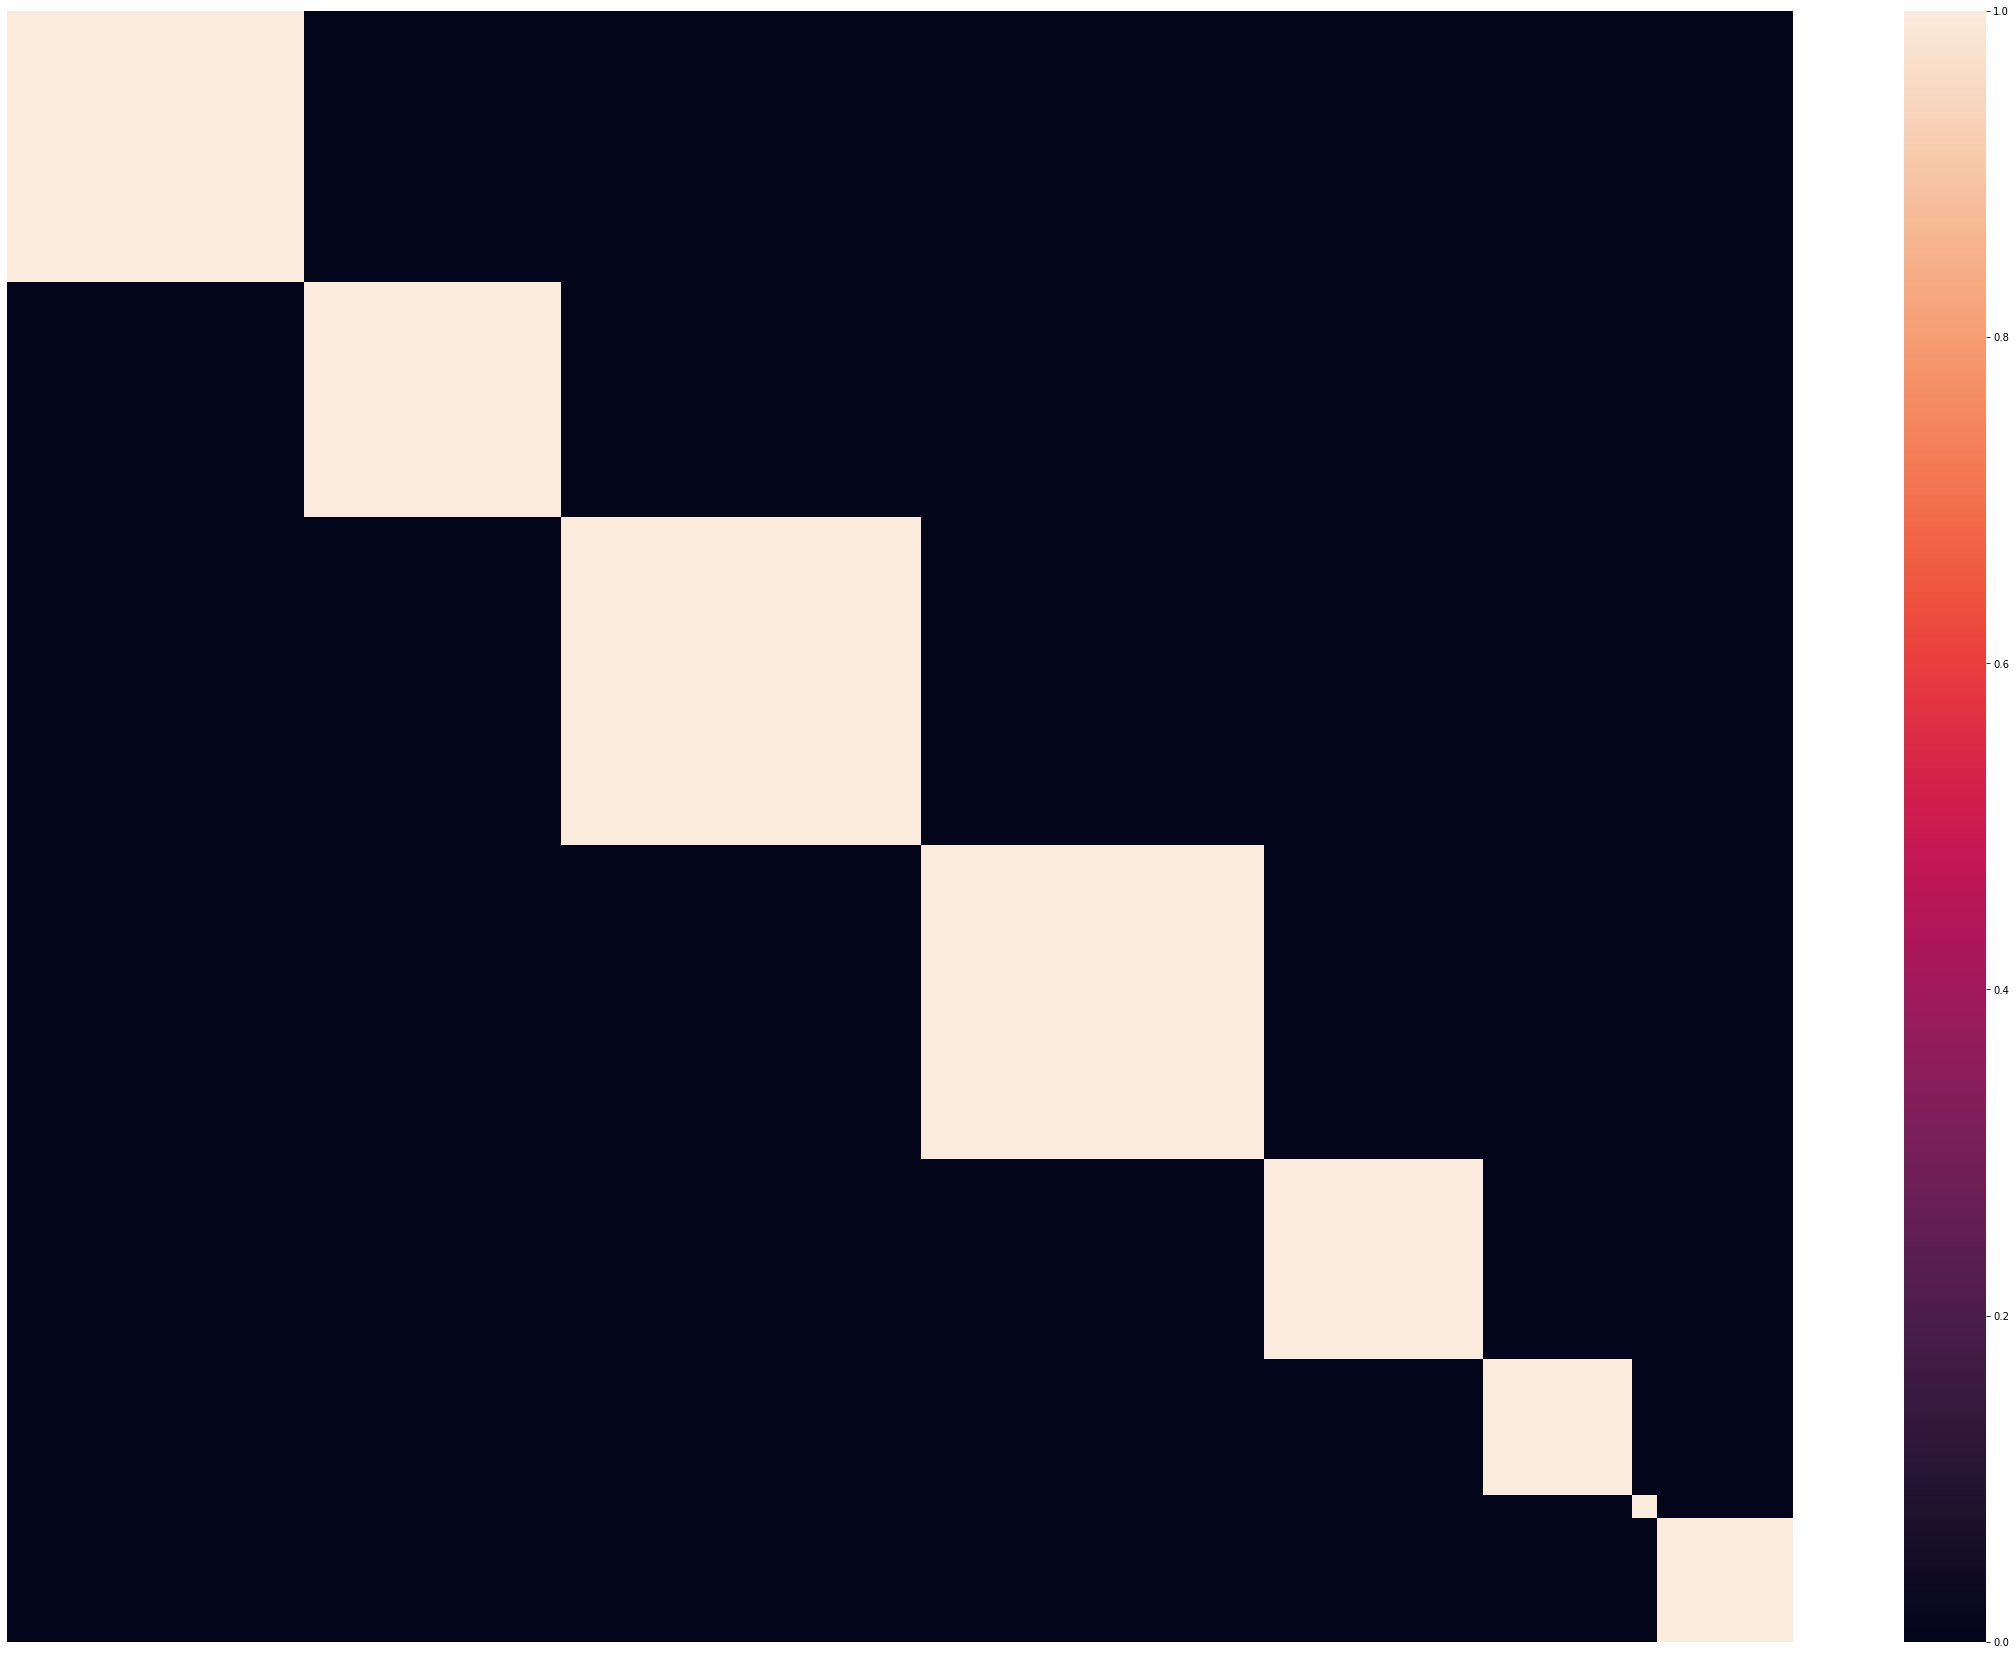

In [29]:
inc = incidence_mat(y_predict)
plot_sorted_mat(inc, y_predict)

The similarity matrix appear as formed by squares that arrange along the main diagonal

## Clusters number

It is always better to search for the correct number of clusters even if we know a priori the one we should use. This is because the data could be explained better by a lower number of clusters.

One of the methods used to search for the correct number of clusters is the WSS (within sum of squares) agains the BSS (between sum of squares) elbow plot

Another way of deciding the number of clusters is the average silhouette score

In [30]:
def wss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in the same cluster
    dist_mat = dist_mat * inc
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    wss = (dist_mat[triu_idx] ** 2).sum()
    
    return wss

def bss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in different clusters
    dist_mat = dist_mat * (1 - inc)
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    bss = (dist_mat[triu_idx] ** 2).sum()
    
    return bss

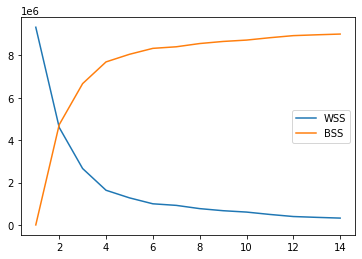

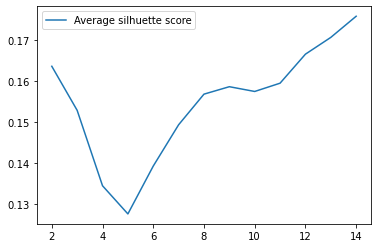

In [31]:
from sklearn.metrics import silhouette_score

wss_list, bss_list, sil_list = [], [], []
clus_list = list(range(1, 15))

for nc in clus_list:
    model = AgglomerativeClustering(n_clusters=nc,
                                    affinity='euclidean', 
                                    linkage='ward')

    y_predict = model.fit_predict(X)
    
    wss_list.append(wss(X, y_predict, 'euclidean'))
    bss_list.append(bss(X, y_predict, 'euclidean'))
    if nc > 1:
        sil_list.append(silhouette_score(X, y_predict, metric='euclidean'))
    
plt.plot(clus_list, wss_list, label='WSS')
plt.plot(clus_list, bss_list, label='BSS')
plt.legend()
plt.show()

plt.plot(clus_list[1:], sil_list, label='Average silhuette score')
plt.legend()

It seems like 2, 8 and 14 could be a correct amount of clusters, 14 performing better against 8, the number of clusters a priori

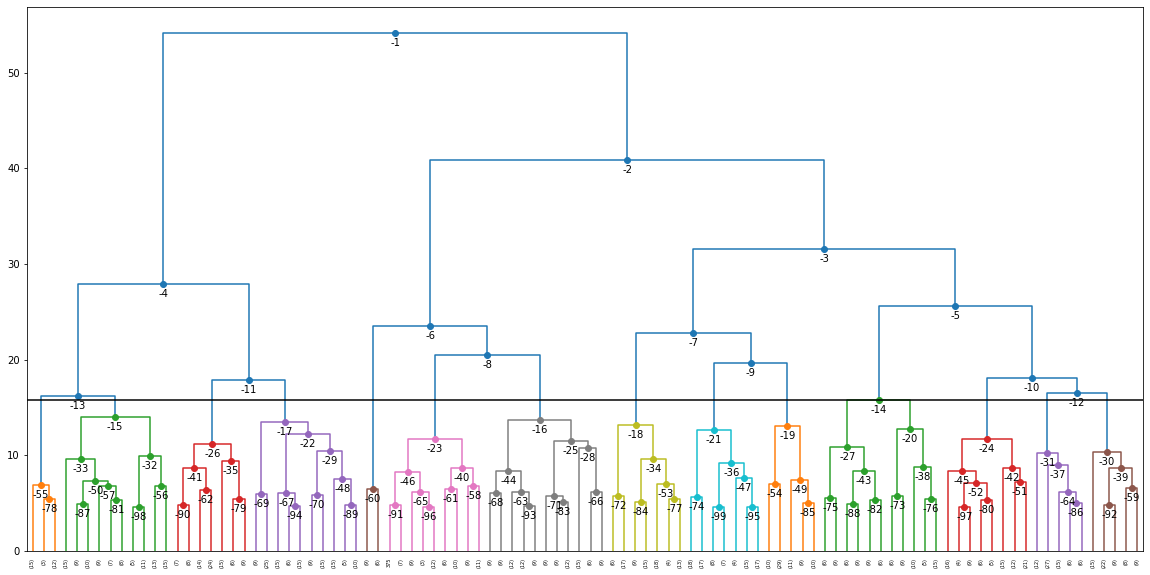

In [32]:
Z = linkage(X, metric='euclidean', method='ward')
fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                          p=100, n_clusters=14)

In [33]:
model = AgglomerativeClustering(n_clusters=14, distance_threshold=distance_threshold, affinity='euclidean', linkage='ward')
y_predict = model.fit_predict(X)
print("14 clusters: " + str(tot_purity( y_predict, y)))
print("8 clusters: " + str(ward_purity))
print("Delta: " + str(ward_purity - tot_purity( y_predict, y)))

14 clusters: 0.46053853290384605
8 clusters: 0.5478180129533966
Delta: 0.08727948004955055


In [34]:
model = AgglomerativeClustering(n_clusters=2, distance_threshold=distance_threshold, affinity='euclidean', linkage='ward')
y_predict = model.fit_predict(X)
print("2 clusters: " + str(tot_purity( y_predict, y)))
print("8 clusters: " + str(ward_purity))
print("Delta: " + str(ward_purity - tot_purity( y_predict, y)))

2 clusters: 0.2506963788249096
8 clusters: 0.5478180129533966
Delta: 0.297121634128487


The Delta is calculated against the known 8 cluster purity score using Ward's method. It seems like even if the average silhouette suggested 14 and the elbow plot suggested 2, the best number of cluster is still 8

## K-MEANS

Kmeans purity 0.4921077065514275


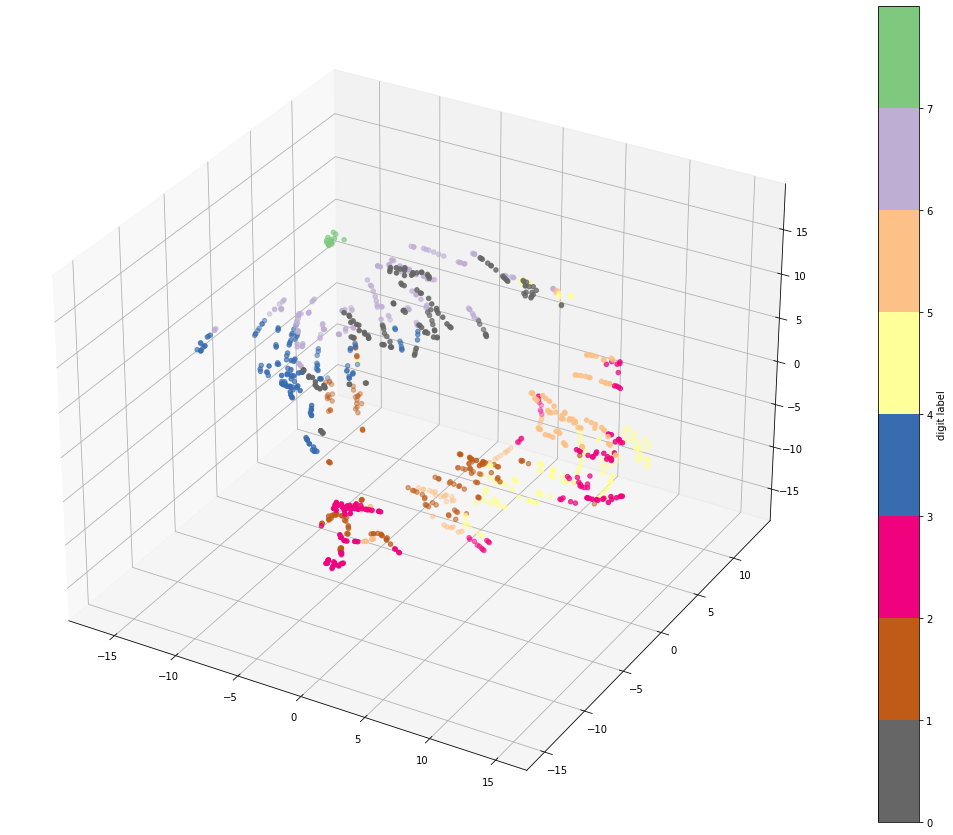

In [35]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8, init='random', random_state=0)             
y_predict = model.fit_predict(X)
print("Kmeans purity", tot_purity(y_predict, y))

plot3d(X, labels=y_predict)

In [36]:
# Random
model = KMeans(n_clusters=8, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=8, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=8, 
                                 distance_threshold=distance_threshold, 
                                 affinity='euclidean', linkage='complete')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict==k].mean(0) for k in range(8)])
model = KMeans(n_clusters=8, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

Random Kmeans purity 0.4921077065514275
Kmeans++ purity 0.5078922933657092
Hierarchical+Kmeans purity 0.38904363969931244


The main difference between Random and K-Means++ is the initialization point, K-Means++ removes the drawback of K means which is it is dependent on initialization of centroid. In this case it seems like K-means++ has slightly better results

## DBSCAN

The last approach is the DBSCAN algorithm, it separates in clusters using the data density

DBSCAN purity 0.1392757660154199
Number of outliers 0
      0
0  1077


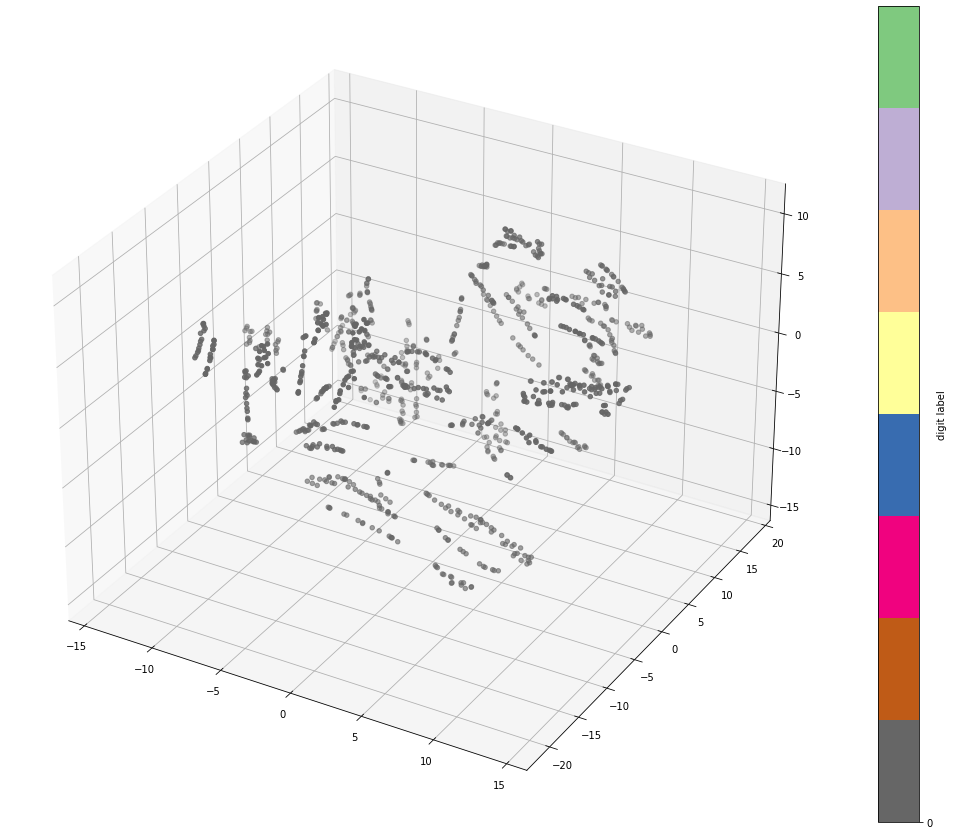

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

model = DBSCAN(eps=20, min_samples=5)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))

print("Number of outliers", (y_predict == -1).sum())
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids)) # eventually index=['']

plot3d(X, labels=y_predict)

The DBSCAN purity is quite low compared to the other types of clustering, this could be due to the fact that there are large differences in density in our data sample, and the DBSCAN method can not divide into clusters in an efficient way if the density differences are high

I will now try to use cross validation to check if the default values are correct

In [38]:
def make_scorer(metric):
    def scorer(estimator, X, y):
        y_pred = estimator.fit_predict(X)
        return metric(y_pred, y)
    return scorer

In [39]:
from sklearn.model_selection import GridSearchCV

params = {'eps': [20], 'min_samples': range(5,20)}
cv = GridSearchCV(model, params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)

In [40]:
print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

{'eps': 20, 'min_samples': 5}
CV score 0.1392757660154199


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
0        0.009230      0.000606         0.006278        0.001107        20   
1        0.007551      0.000107         0.005177        0.000435        20   
2        0.007852      0.000245         0.005056        0.000586        20   
3        0.007752      0.000460         0.005113        0.000479        20   
4        0.008457      0.000467         0.005294        0.000541        20   
5        0.007526      0.000182         0.005664        0.000556        20   
6        0.007426      0.000222         0.005540        0.001270        20   
7        0.008169      0.000561         0.005121        0.000442        20   
8        0.007415      0.000230         0.005315        0.000491        20   
9        0.008334      0.000499         0.005125        0.000543        20   
10       0.007694      0.000069         0.005692        0.000548        20   
11       0.007738      0.000290         0.005466        0.001116        20   
12       0.007480      0.000198         0.005125        0.000492        20   
13       0.011929      0.001534         0.005142        0.000610        20   
14       0.007725      0.000420         0.005177        0.000541        20   

   param_min_samples                          params  split0_test_score  \
0                  5   {'eps': 20, 'min_samples': 5}           0.417827   
1                  6   {'eps': 20, 'min_samples': 6}           0.417827   
2                  7   {'eps': 20, 'min_samples': 7}           0.417827   
3                  8   {'eps': 20, 'min_samples': 8}           0.417827   
4                  9   {'eps': 20, 'min_samples': 9}           0.417827   
5                 10  {'eps': 20, 'min_samples': 10}           0.417827   
6                 11  {'eps': 20, 'min_samples': 11}           0.417827   
7                 12  {'eps': 20, 'min_samples': 12}           0.417827   
8                 13  {'eps': 20, 'min_samples': 13}           0.417827   
9                 14  {'eps': 20, 'min_samples': 14}           0.417827   
10                15  {'eps': 20, 'min_samples': 15}           0.417827   
11                16  {'eps': 20, 'min_samples': 16}           0.417827   
12                17  {'eps': 20, 'min_samples': 17}           0.417827   
13                18  {'eps': 20, 'min_samples': 18}           0.417827   
14                19  {'eps': 20, 'min_samples': 19}           0.417827   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.376045           0.367688         0.387187        0.021933   
1            0.376045           0.367688         0.387187        0.021933   
2            0.376045           0.367688         0.387187        0.021933   
3            0.376045           0.367688         0.387187        0.021933   
4            0.376045           0.367688         0.387187        0.021933   
5            0.376045           0.367688         0.387187        0.021933   
6            0.376045           0.367688         0.387187        0.021933   
7            0.376045           0.367688         0.387187        0.021933   
8            0.376045           0.367688         0.387187        0.021933   
9            0.376045           0.367688         0.387187        0.021933   
10           0.376045           0.367688         0.387187        0.021933   
11           0.376045           0.367688         0.387187        0.021933   
12           0.376045           0.367688         0.387187        0.021933   
13           0.376045           0.367688         0.387187        0.021933   
14           0.376045           0.367688         0.387187        0.021933   

    rank_test_score  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
5                 1  
6                 1  
7                 1  
8                 1  
9                 1  
10                1  
11                1  
12                1  
13           

Indeed the default values are the one predicted by the cross validation score and it does not seem to perform well, probably for the differences in density as stated above. 
The best method of clustering seems to be the Ward's method with a total of 8 clusters.

## Non categorical dataset

I will now try to eliminate the categorical values using the Ward's method

In [41]:
X = mice_data_ext.drop(["Genotype", "Treatment", "Behavior","class"], axis=1)

In [42]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

0         1         2         3         4         5         6   \
0  0.151122  0.212885  0.824638  0.612119  0.630482  0.327006  0.448666   
1  0.155750  0.188226  0.776455  0.601070  0.585247  0.311887  0.429899   
2  0.153459  0.205696  0.793572  0.558911  0.575910  0.306369  0.441381   
3  0.125169  0.157688  0.637326  0.468152  0.480646  0.335530  0.444307   
4  0.122146  0.157838  0.637787  0.426467  0.441977  0.314976  0.433100   

         7         8         9   ...        67        68   69        70  \
0  0.168257  0.617322  0.232553  ...  0.162941  0.028517  1.0  0.426816   
1  0.154925  0.590173  0.205362  ...  0.220010  0.023560  1.0  0.429952   
2  0.153485  0.607102  0.199194  ...  0.186816  0.025076  1.0  0.448652   
3  0.132074  0.486945  0.205135  ...  0.179047  0.036926  1.0  0.392700   
4  0.129086  0.410194  0.189152  ...  0.245702  0.034579  1.0  0.410187   

         71        72        73        74        75        76  
0  0.018981  0.336299  0.028928  0.022112  0.022165  0.705738  
1  0.015651  0.365208  0.026612  0.024903  0.024628  0.749771  
2  0.017228  0.353621  0.026537  0.023436  0.021532  0.868229  
3  0.021404  0.265619  0.041806  0.035298  0.037879  0.721879  
4  0.020934  0.350381  0.031977  0.029292  0.039121  0.812053  

[5 rows x 77 columns]

In [43]:
model = AgglomerativeClustering(n_clusters=8, distance_threshold=distance_threshold, affinity='euclidean', linkage='ward')
y_predict = model.fit_predict(X)
tot_purity(y_predict, y)

0.33704735373370664

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

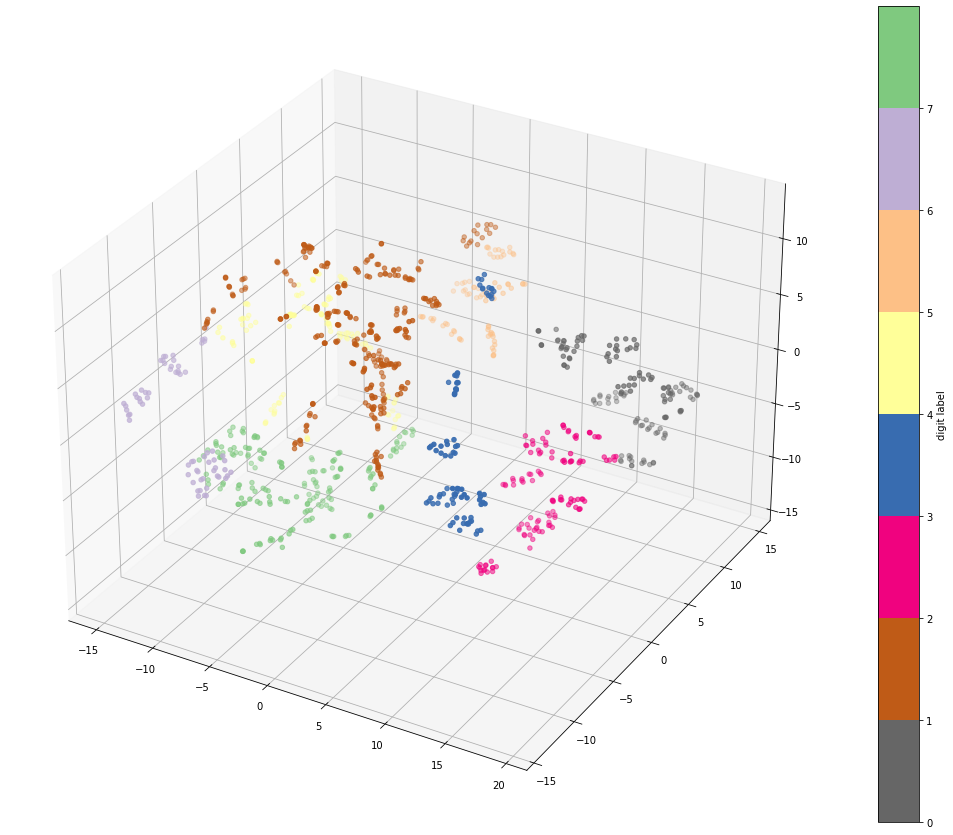

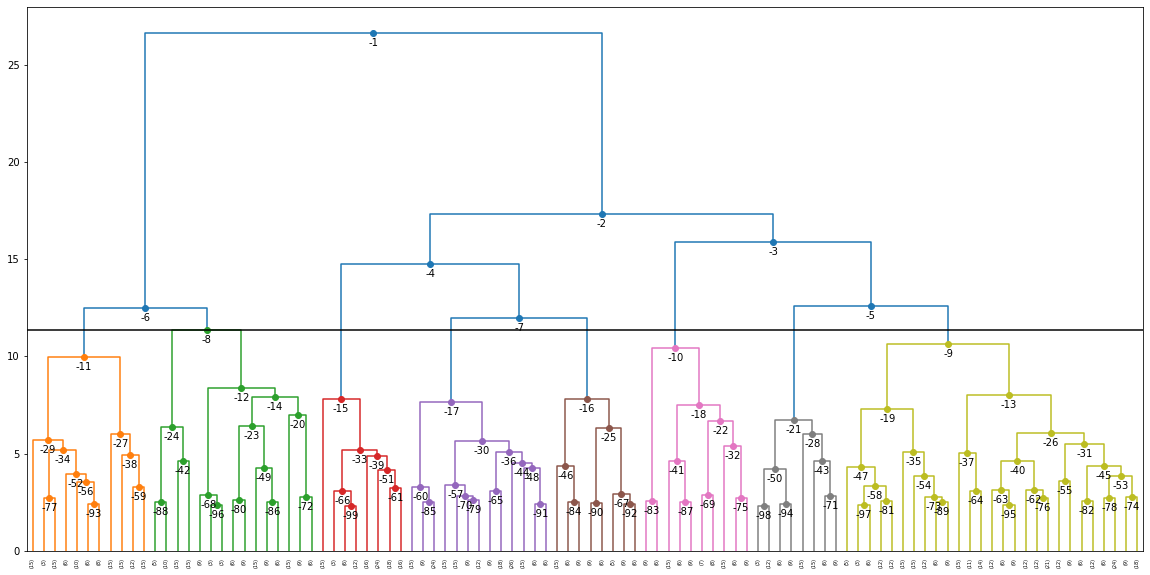

In [44]:
plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=n_clusters, 
                color_threshold=distance_threshold)

In [45]:
# Random
model = KMeans(n_clusters=8, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=8, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=8, 
                                 distance_threshold=distance_threshold, 
                                 affinity='euclidean', linkage='complete')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict==k].mean(0) for k in range(8)])
model = KMeans(n_clusters=8, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

Random Kmeans purity 0.2999071494660495
Kmeans++ purity 0.3249767873469495
Hierarchical+Kmeans purity 0.3036211698857104


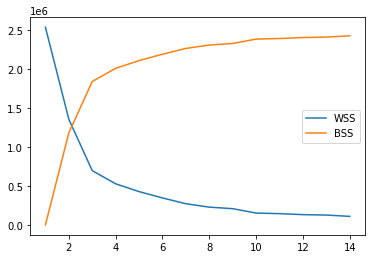

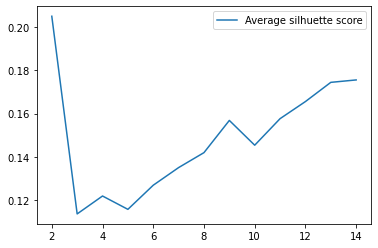

In [46]:
from sklearn.metrics import silhouette_score

wss_list, bss_list, sil_list = [], [], []
clus_list = list(range(1, 15))

for nc in clus_list:
    model = AgglomerativeClustering(n_clusters=nc,
                                    affinity='euclidean', 
                                    linkage='ward')

    y_predict = model.fit_predict(X)
    
    wss_list.append(wss(X, y_predict, 'euclidean'))
    bss_list.append(bss(X, y_predict, 'euclidean'))
    if nc > 1:
        sil_list.append(silhouette_score(X, y_predict, metric='euclidean'))
    
plt.plot(clus_list, wss_list, label='WSS')
plt.plot(clus_list, bss_list, label='BSS')
plt.legend()
plt.show()

plt.plot(clus_list[1:], sil_list, label='Average silhuette score')
plt.legend()

It seems like 2 clustering are describing the dataset without the categorical variables better

In [47]:
model = KMeans(n_clusters=2, init='random', random_state=0)             
y_predict_best = model.fit_predict(X)
print("Kmeans purity", tot_purity(y_predict_best, y))

Kmeans purity 0.1922005570991654


As expected the dataset with the categorical variables can do clustering in a more efficient way, the difference between the best clustering method between the two dataset is given here

In [48]:
model = KMeans(n_clusters=8, init='k-means++', random_state=0)             
print("Categorical dataset: " + str(ward_purity))
print("Non categorical dataset: " + str(tot_purity(model.fit_predict(X), y)))
print("Delta: " + str(ward_purity - tot_purity(model.fit_predict(X), y)))

Categorical dataset: 0.5478180129533966
Non categorical dataset: 0.3249767873469495
Delta: 0.2228412256064471


## Conclusions

In conclusion a purity of 0.548 has been obtained from the Ward's method, using the original amount of clusters. In this case it seems plausible to correctly cluster a mice in a certain class, given the gene expressions and the caterical variables. Without the use of categorical variables the purity score seems to be not high enough. 
That being said, the categorical variables are the ones that define the class, so a higher purity score was expected and obtained. In the case of a mice that has NA as the caterical variables, the clustering done in the second analysis is the only one doable, even if the purity is just 0.325, having then a high chance of committing a mistake